# Various simulations related to the signature and the randomized signature
## Notebook for introducing the scaling activation function

### Mechanism for Brownian Motion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

C:\Users\vjeko\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from timeit import default_timer as timer

In [3]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

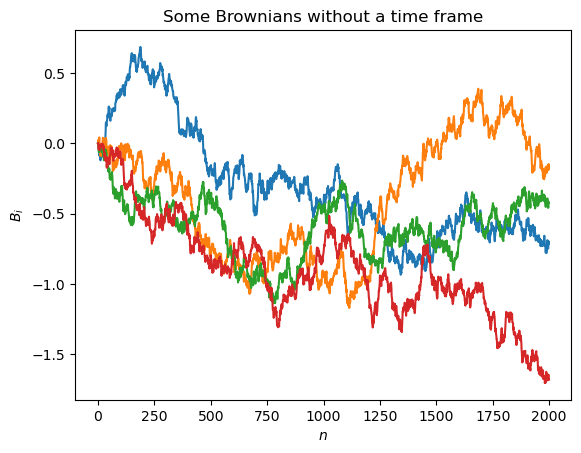

In [4]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [5]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [6]:
A, v

(array([[[-0.82371597, -2.55297747, -0.35215292,  1.34811818],
         [ 0.54236323,  0.28343748,  1.41244127, -0.20726198]],
 
        [[-0.23364067,  0.41980106, -0.72212675,  0.63046589],
         [ 0.53363564, -0.35393496, -1.52106715,  0.33157478]],
 
        [[-0.44467967,  0.25238148, -0.62210719,  0.01505353],
         [ 0.06706421, -0.01844299, -0.23272812, -1.89454433]]]),
 array([0.2747388 , 0.30926017, 0.92470109]))

### Time&step structure

In [7]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

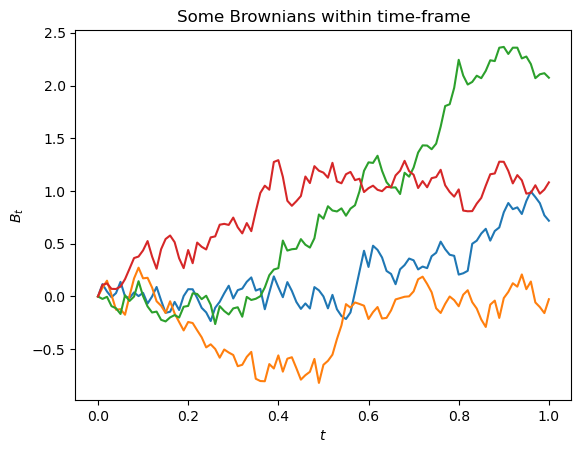

In [8]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(N))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Time&step structure

In [9]:
N = 1001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [10]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [11]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

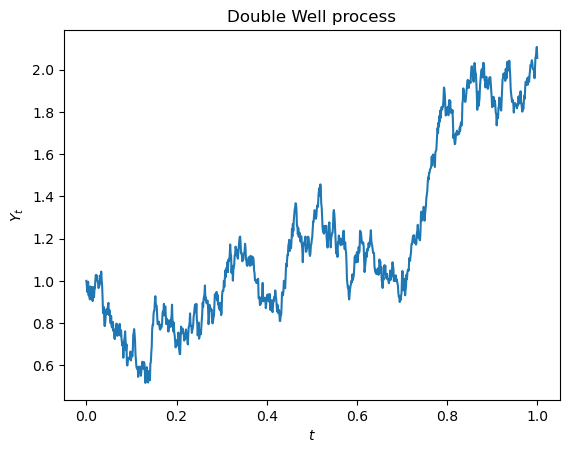

In [12]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [13]:
k = 15
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

##### Without scaling

In [14]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (A@Z[i] + b)*dY[i] 

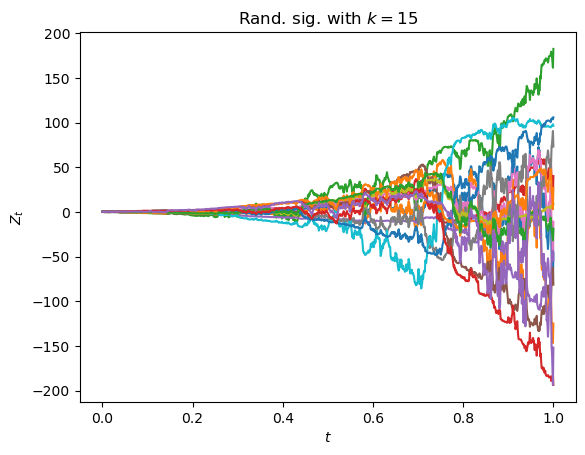

In [15]:
for i in range(15):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. sig. with $k = 15$")
plt.xlabel("$t$")
plt.ylabel("$Z_t$")
plt.show()

##### Introducing the scaling constant $\lambda <1$ 

In [16]:
lambda_1d = 1/8

In [17]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (lambda_1d * A@Z[i] + b)*dY[i] 

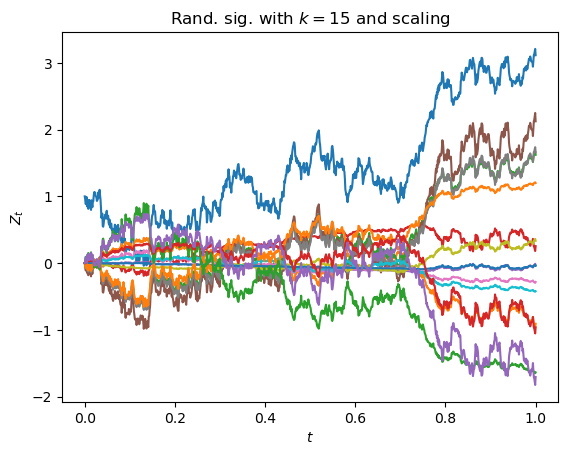

In [18]:
for i in range(15):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. sig. with $k = 15$ and scaling")
plt.xlabel("$t$")
plt.ylabel("$Z_t$")
plt.show()